In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
data = pd.read_csv('Gold_price.csv')

In [6]:
data.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2017-02-06,0.79,0.79,0.76,0.76,0.79,7430.0,7.0,5848.0,7430.0,100.0,0.03,-0.03
1,2017-02-03,0.79,0.79,0.79,0.79,0.79,310.0,4.0,244.0,310.0,100.0,0.00,0.00
2,2017-02-02,0.83,0.83,0.83,0.83,0.83,75.0,1.0,62.0,75.0,100.0,0.00,0.00
3,2017-01-31,0.87,0.87,0.87,0.87,0.87,1050.0,2.0,913.0,1050.0,100.0,0.00,0.00
4,2017-01-25,0.91,0.91,0.91,0.91,0.91,400.0,1.0,364.0,400.0,100.0,0.00,0.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1660 non-null   object 
 1   Open                       1660 non-null   float64
 2   High                       1660 non-null   float64
 3   Low                        1660 non-null   float64
 4   Close                      1660 non-null   float64
 5   WAP                        1660 non-null   float64
 6   No. of Shares              1660 non-null   float64
 7   No. of Trades              1660 non-null   float64
 8   Total Turnover             1660 non-null   float64
 9   Deliverable Quantity       1660 non-null   float64
 10  % Deli. Qty to Traded Qty  1660 non-null   float64
 11  Spread H-L                 1660 non-null   float64
 12  Spread C-O                 1660 non-null   float64
dtypes: float64(12), object(1)
memory usage: 168.7+ K

In [8]:
data.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
WAP                          0
No. of Shares                0
No. of Trades                0
Total Turnover               0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread H-L                   0
Spread C-O                   0
dtype: int64

In [9]:
data.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1.660000e+03,1660.000000,1660.000000,1660.000000,1660.000000
mean,11.834367,12.174048,11.221578,11.673934,11.688802,101330.338554,122.983735,1.664520e+06,75754.484337,88.678651,0.952470,-0.160434
std,17.169590,17.704607,16.143363,16.837100,16.920058,140560.465729,138.844766,2.938726e+06,96646.348605,16.648158,1.960071,1.342787
min,0.500000,0.520000,0.500000,0.520000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,4.760000,0.000000,-17.150000
25%,1.350000,1.380000,1.320000,1.350000,1.336219,4393.250000,14.000000,7.159500e+03,4300.000000,78.932500,0.040000,-0.150000
50%,5.255000,5.380000,4.950000,5.085000,5.119729,33871.000000,72.500000,1.086300e+05,31095.000000,100.000000,0.180000,0.000000
75%,11.392500,11.940000,11.250000,11.377500,11.451724,153416.750000,185.250000,2.057775e+06,122723.000000,100.000000,0.890000,0.030000
max,84.950000,84.950000,71.500000,74.550000,74.972394,849341.000000,752.000000,2.383048e+07,631381.000000,100.000000,23.300000,14.000000


In [10]:
data.shape

(1660, 13)

In [11]:
data_corr = data.corr()

C:\Users\muhammad sani\AppData\Local\Temp\ipykernel_12316\2216729752.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


<Axes: >

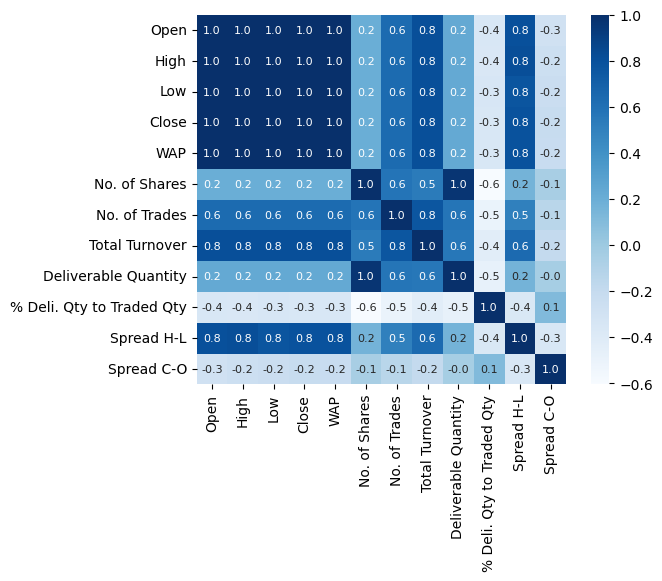

In [19]:
sns.heatmap(data_corr,cbar=True,fmt='.1f',square=True,annot=True,annot_kws = {'size':8},cmap='Blues')

In [20]:
X = data.drop(['Close','Date'],axis=1)
Y = data['Close']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=1,test_size=0.1)

In [23]:
model = RandomForestRegressor()

In [24]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
train_pred = model.predict(x_test)
tr_acc = metrics.r2_score(y_test,train_pred)
print(tr_acc)

0.9988187542575269


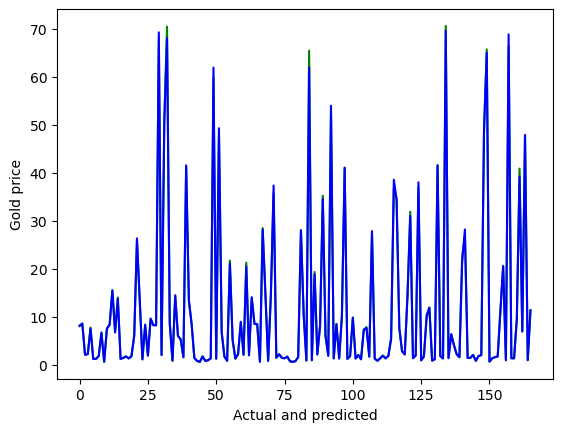

In [32]:
y_test = list(y_test)

plt.plot(y_test,color='green',label='Actual price')
plt.plot(train_pred,color='blue',label='Predicted price')
plt.xlabel('Actual and predicted')
plt.ylabel('Gold price')
plt.show()